ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [16]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-07 08:02:50--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-07 08:02:50 (44.2 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [17]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime

# เพิ่ม option ของการอ่านไฟล์ parse_dates , index_col(ใช้อินเดกซ์ข้อมูลของเราให้ใช้วันที่เลย) , date_format(รูปแบบวันที่ ดูจากไฟล์ได้ ปี-เดือน)
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data
# formatใหม่จะเป็นปี/เดือน/วัน วันจะเริ่มจากวันที่1ของแต่ละเดือน

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


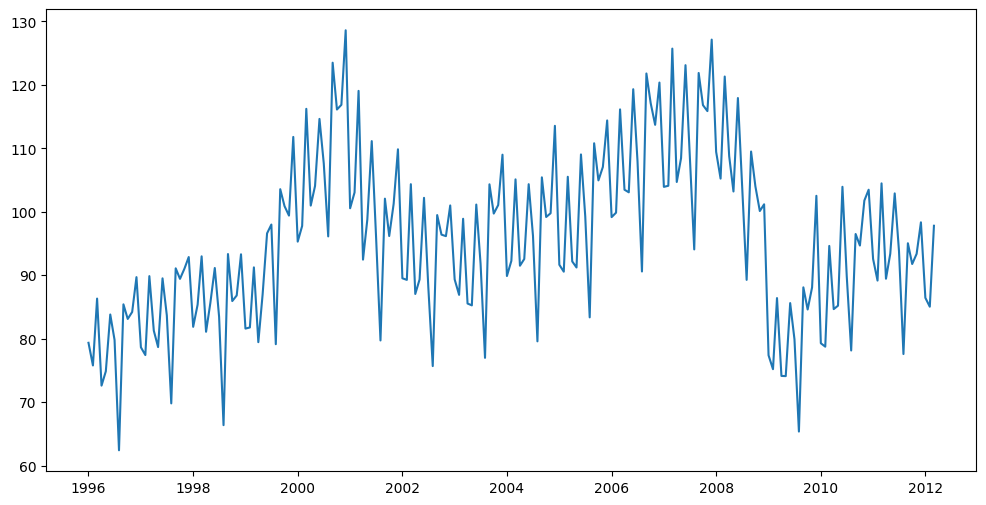

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]); # พล็อตข้อมูลคอลัมน์ value

In [20]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [21]:
# ดึงข้อมูลในช่วงเวลาที่ต้องการ
data.loc['2011-11-01','value']

np.float64(93.37)

In [22]:
# Add or change values

data.loc['2012-03-01','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


# Moving average

In [33]:
#กรณีเดือนเป็นเลขคี่
#data['MA'] = data['value'].rolling(window=5,center=True).mean()

#กรณีเดือนเป็นเลขคู่
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


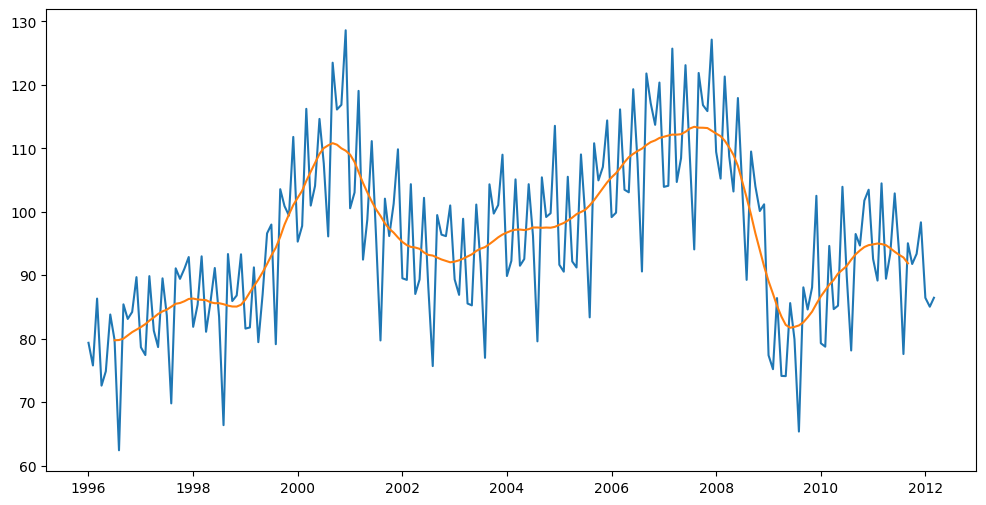

In [36]:
plt.figure(figsize=(12,6))
plt.plot(data['value']) #ค่าจริง
plt.plot(data['MA']); #ค่าที่ทำ MA (ค่าเฉลี่ย)

# Classical decomposition

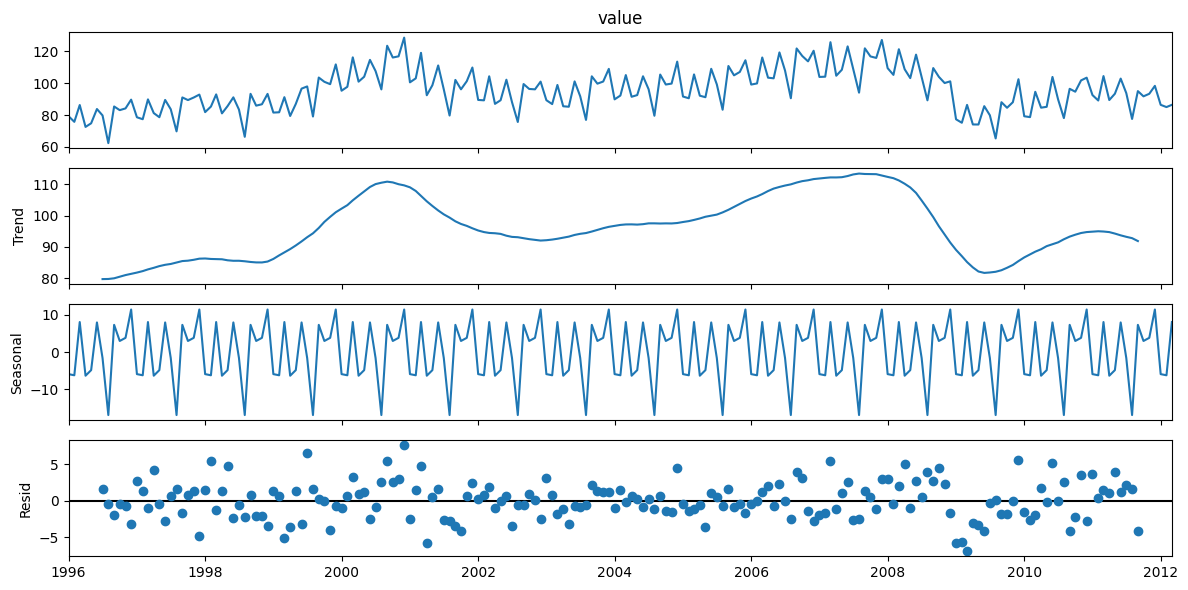

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose # time series analysis (tsa)
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',period=12) # กำหนดโมเดล(บวก/คูณ)และคาบ

result_add.plot();

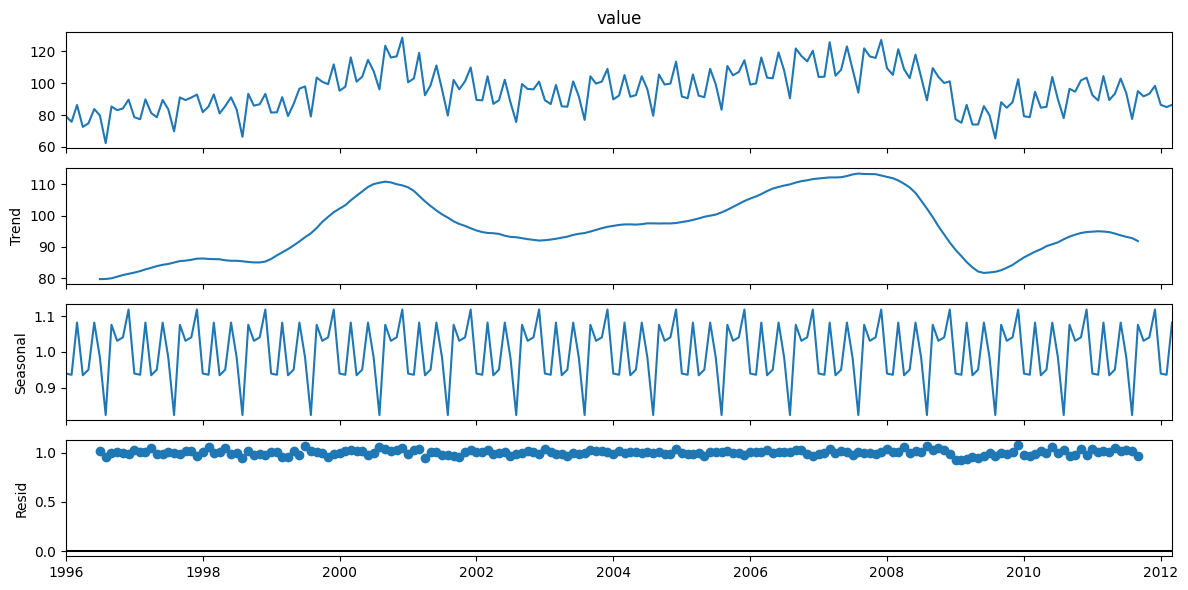

In [41]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [45]:
print(result_add.trend) # T (แนวโน้ม) อาจจะมีบางค่าหาย
print(result_add.seasonal) # S (ฤดูกาล)
print(result_add.resid) # I (ส่วนเหลือ) อาจจะมีบางค่าหาย
print(result_add.observed) # ค่าสังเกต

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.890125
1996-02-01    -6.201736
1996-03-01     8.080708
1996-04-01    -6.317431
1996-05-01    -4.820931
                ...    
2011-11-01     3.844902
2011-12-01    11.445041
2012-01-01    -5.890125
2012-02-01    -6.201736
2012-03-01     8.080708
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้

1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  

1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set

1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  

3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง

4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [46]:
# 1.1
ts_train = data.loc[:'2009-12-01',('value')]
ts_test = data.loc['2010-01-01':,('value')]
ts_test

,value
time,
2010-01-01,79.28
2010-02-01,78.74
2010-03-01,94.62
2010-04-01,84.66
2010-05-01,85.20
2010-06-01,103.94
2010-07-01,89.87
2010-08-01,78.14
2010-09-01,96.50


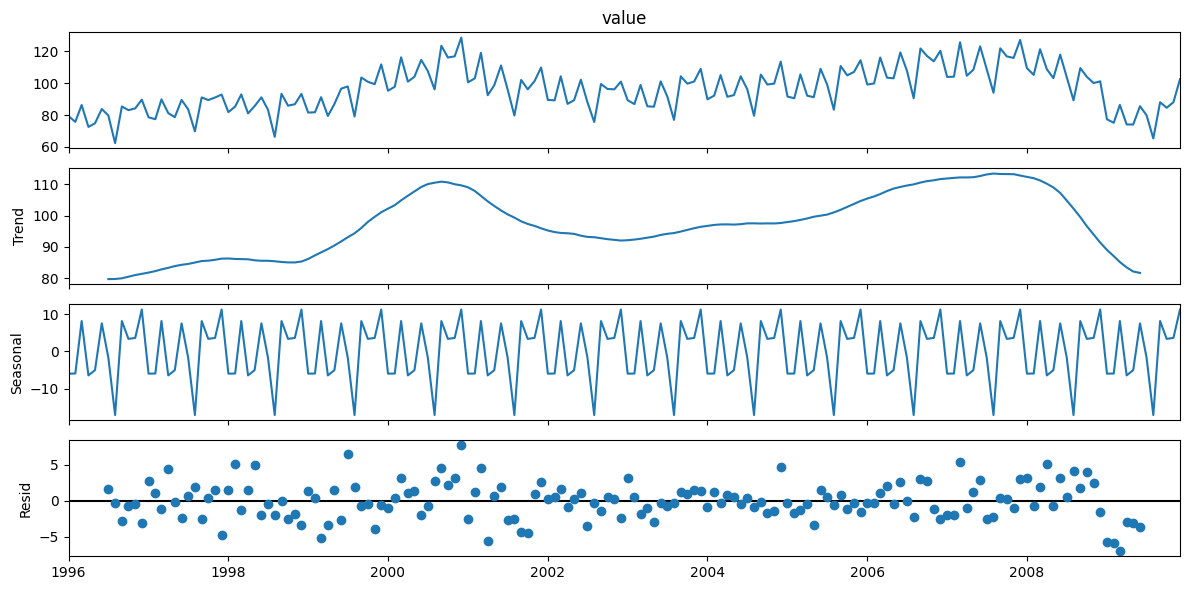

In [48]:
# 1.2
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result = seasonal_decompose(ts_train, model='additive',period=12)
result.plot();

In [52]:
# Decompose

T_hat = result.trend.dropna().iloc[-1]

S_hat = result.seasonal.dropna().iloc[:12]
S_hat = list(S_hat)

R_hat = result.resid.dropna().iloc[-1]

print('T_hat',T_hat)
print('S_hat',S_hat)
print('R_hat',R_hat)

T_hat 81.725
S_hat [-5.98585737179487, -5.957940705128207, 8.183245192307693, -6.462427884615383, -5.041177884615387, 7.5529887820512815, -1.6409535256410257, -17.138902243589744, 8.178886217948719, 3.378341346153848, 3.6443349358974384, 11.28946314102564]
R_hat -3.6679887820512764


In [61]:
print(T_hat+S_hat[0]+R_hat)

72.07115384615385


In [63]:
predict = []
for i in range(3):
  for j in range(12):
    predict.append(T_hat+S_hat[j]+R_hat)
print(len(predict))
print(predict)

36
[np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564), np.float64(71.59458333333333), np.float64(73.01583333333332), np.float64(85.61), np.float64(76.41605769230769), np.float64(60.91810897435898), np.float64(86.23589743589743), np.float64(81.43535256410256), np.float64(81.70134615384615), np.float64(89.34647435897435), np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564), np.float64(71.59458333333333), np.float64(73.01583333333332), np.float64(85.61), np.float64(76.41605769230769), np.float64(60.91810897435898), np.float64(86.23589743589743), np.float64(81.43535256410256), np.float64(81.70134615384615), np.float64(89.34647435897435), np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564), np.float64(71.59458333333333), np.float64(73.01583333333332), np.float64(85.61), np.float64(76.41605769230769), np.float64(60.91810897435898), np.float64(86.23589743589743), np.float64(81.4

In [64]:
dates = pd.date_range('2010-01-01', periods=36, freq='MS')
dates = pd.DataFrame(dates)
dates

,0
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
5,2010-06-01
6,2010-07-01
7,2010-08-01
8,2010-09-01
9,2010-10-01


In [68]:
# Create dataframe
df_predict = pd.DataFrame(predict,columns=['Forecast_value'])

ts_new = pd.concat([dates,ts_test.reset_index(drop=True),df_predict.reset_index(drop=True)],axis=1)
ts_new = ts_new.dropna()
ts_new.set_index(0,inplace=True)
ts_new

,value,Forecast_value
0,,
2010-01-01,79.28,72.071154
2010-02-01,78.74,72.099071
2010-03-01,94.62,86.240256
2010-04-01,84.66,71.594583
2010-05-01,85.20,73.015833
2010-06-01,103.94,85.610000
2010-07-01,89.87,76.416058
2010-08-01,78.14,60.918109
2010-09-01,96.50,86.235897


In [71]:
y_true = ts_new['Forecast_value']
y_pred = ts_new['value']

In [73]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [77]:
print(rmse(y_true,y_pred))

14.419214810522636


Text(0, 0.5, 'Electric Equipments')

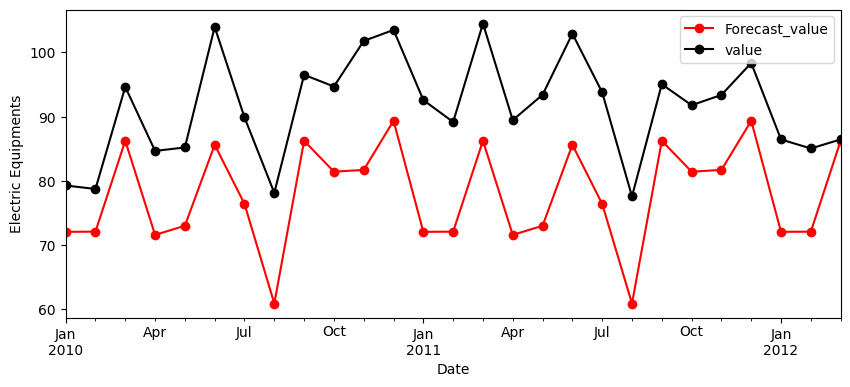

In [81]:
ax = ts_new['Forecast_value'].plot(marker='o', color='Red', figsize=(10,4))
ax = ts_new['value'].plot(marker='o', color='Black', figsize=(10,4))
ax.legend(['Forecast_value','value'])
ax.set_xlabel('Date')
ax.set_ylabel('Electric Equipments')